In [93]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

vid_haar = pd.read_csv("Haar_Video_Actual_Predicted.csv") 
vid_mar = pd.read_csv("Mar_Video_Actual_Predicted.csv") 

vid_haar.head()

,FrameNo,ActualSmile,PredictedSmile
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


In [94]:
vid_mar.head()

,FrameNo,ActualSmile,PredictedSmile
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


In [95]:
haar_confusion_matrix = pd.crosstab(vid_haar['ActualSmile'], vid_haar['PredictedSmile'], rownames=['Actual'], colnames=['Predicted'])
print (haar_confusion_matrix)

Predicted    0     1
Actual              
0          674  1169
1          175  1273


In [96]:
haar_TN = 674
haar_FN = 175
haar_FP = 1169
haar_TP = 1273

In [97]:
mar_confusion_matrix = pd.crosstab(vid_mar['ActualSmile'], vid_mar['PredictedSmile'], rownames=['Actual'], colnames=['Predicted'])
print (mar_confusion_matrix)

Predicted     0    1
Actual              
0          1597  246
1           565  883


In [98]:
mar_TN = 1597
mar_FN = 565
mar_FP = 246
mar_TP = 883

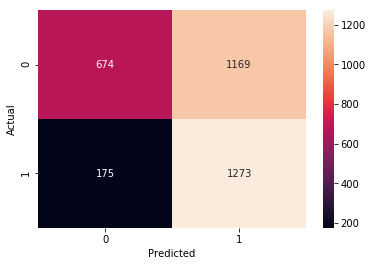

In [99]:
sn.heatmap(haar_confusion_matrix, annot=True, fmt='d')
plt.show()

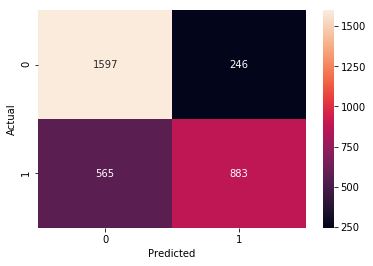

In [101]:
sn.heatmap(mar_confusion_matrix, annot=True, fmt='d')
plt.show()

In [102]:
population = 3291 #total frames in video

haar_accuracy = (haar_TP + haar_TN) / population
haar_precision = haar_TP / (haar_TP + haar_FP)
haar_recall = haar_TP / (haar_TP + haar_FN)
if (haar_precision + haar_recall) == 0:
    haar_f1_score = 0.0
else:
    haar_f1_score = 2 * (haar_precision * haar_recall) / (haar_precision + haar_recall)


mar_accuracy = (mar_TP + mar_TN) / population
mar_precision = mar_TP / (mar_TP + mar_FP)
mar_recall = mar_TP / (mar_TP + mar_FN)
mar_f1_score = 2 * (mar_precision * mar_recall) / (mar_precision + mar_recall)

In [103]:
print("Accuracy HAAR (Video): " + str(haar_accuracy))
print("Precision HAAR (Video): " + str(haar_precision))
print("Recall HAAR (Video): " + str(haar_recall))
print("F1-Score HAAR (Video): " + str(haar_f1_score))
print(" ")
print("Accuracy MAR (Video): " + str(mar_accuracy))
print("Precision MAR (Video): " + str(mar_precision))
print("Recall MAR (Video): " + str(mar_recall))
print("F1-Score MAR (Video): " + str(mar_f1_score))

Accuracy HAAR (Video): 0.5916134913400183
Precision HAAR (Video): 0.5212940212940212
Recall HAAR (Video): 0.8791436464088398
F1-Score HAAR (Video): 0.6544987146529563
 
Accuracy MAR (Video): 0.7535703433606806
Precision MAR (Video): 0.7821080602302923
Recall MAR (Video): 0.6098066298342542
F1-Score MAR (Video): 0.6852929763290648


In [104]:
#!pip install pandas_ml

In [105]:
from pandas_ml import ConfusionMatrix

Haar_Confusion_Matrix = ConfusionMatrix(vid_haar['ActualSmile'], vid_haar['PredictedSmile'])
Haar_Confusion_Matrix.print_stats()

population: 3291
P: 1448
N: 1843
PositiveTest: 2442
NegativeTest: 849
TP: 1273
TN: 674
FP: 1169
FN: 175
TPR: 0.8791436464088398
TNR: 0.3657080846446012
PPV: 0.5212940212940212
NPV: 0.7938751472320377
FPR: 0.6342919153553989
FDR: 0.4787059787059787
FNR: 0.12085635359116022
ACC: 0.5916134913400183
F1_score: 0.6544987146529563
MCC: 0.2777943780717659
informedness: 0.24485173105344105
markedness: 0.3151691685260589
prevalence: 0.43998784563962323
LRP: 1.3860237299670586
LRN: 0.33047219535386985
DOR: 4.19407063424172
FOR: 0.2061248527679623


In [106]:
Mar_Confusion_Matrix = ConfusionMatrix(vid_mar['ActualSmile'], vid_mar['PredictedSmile'])
Mar_Confusion_Matrix.print_stats()

population: 3291
P: 1448
N: 1843
PositiveTest: 1129
NegativeTest: 2162
TP: 883
TN: 1597
FP: 246
FN: 565
TPR: 0.6098066298342542
TNR: 0.8665219750406945
PPV: 0.7821080602302923
NPV: 0.7386679000925069
FPR: 0.13347802495930547
FDR: 0.2178919397697077
FNR: 0.39019337016574585
ACC: 0.7535703433606806
F1_score: 0.6852929763290648
MCC: 0.498056710257949
informedness: 0.47632860487494866
markedness: 0.5207759603227993
prevalence: 0.43998784563962323
LRP: 4.56859194627858
LRN: 0.45029829756760775
DOR: 10.14570112957767
FOR: 0.26133209990749307


Text(0.5, 0, 'Methods')

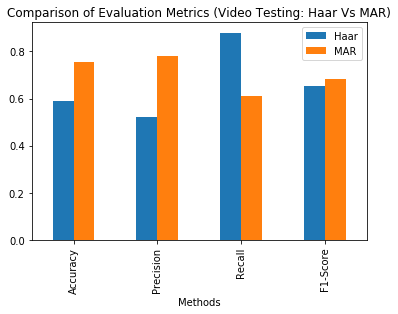

In [107]:
haar_vs_maar_img = pd.DataFrame({
    "Haar":[haar_accuracy, haar_precision, haar_recall, haar_f1_score],
    "MAR":[mar_accuracy, mar_precision, mar_recall, mar_f1_score],
    }, 
    index=["Accuracy", "Precision", "Recall", "F1-Score"]
)

haar_vs_maar_img.plot(kind="bar")
plt.title("Comparison of Evaluation Metrics (Video Testing: Haar Vs MAR)")
plt.xlabel("Methods")
#plt.ylabel("Pies Consumed")